<a href="https://colab.research.google.com/github/kayvour/AirQAlert/blob/main/uni_lab3_multiple_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

df = pd.read_csv('/content/FuelConsumption.csv')
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [25]:
#Selecting features
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


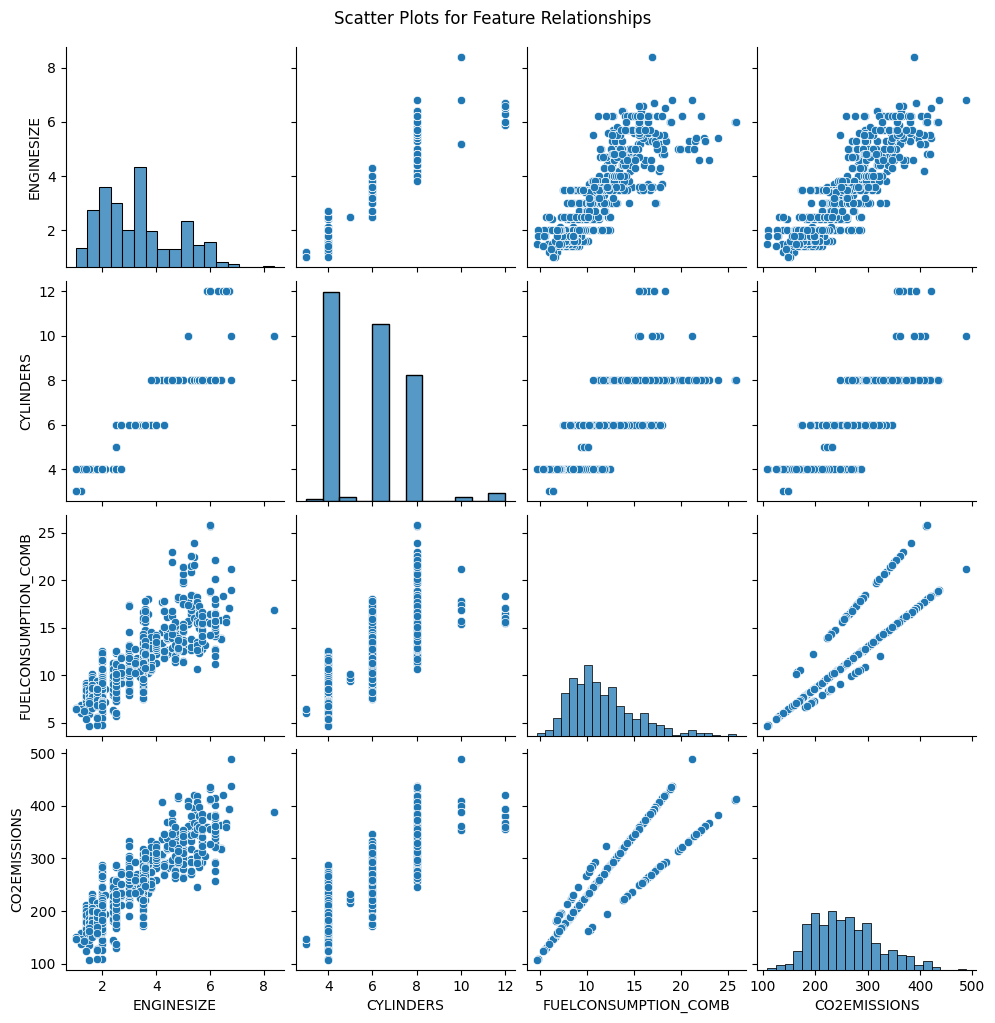

In [26]:
import seaborn as sns

# Pairplot for visual inspection
sns.pairplot(cdf)
plt.suptitle("Scatter Plots for Feature Relationships", y=1.02)
plt.show()


In [27]:
#Multicollinearity Check
# 1. Predict ENGINESIZE
X = cdf[['CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = cdf['ENGINESIZE']
r2_eng = LinearRegression().fit(X, y).score(X, y)
print("ENGINESIZE R²: %.3f, Tolerance: %.3f" % (r2_eng, 1 - r2_eng))

# 2. Predict CYLINDERS
X = cdf[['ENGINESIZE', 'FUELCONSUMPTION_COMB']]
y = cdf['CYLINDERS']
r2_cyl = LinearRegression().fit(X, y).score(X, y)
print("CYLINDERS R²: %.3f, Tolerance: %.3f" % (r2_cyl, 1 - r2_cyl))

# 3. Predict FUELCONSUMPTION_COMB
X = cdf[['ENGINESIZE', 'CYLINDERS']]
y = cdf['FUELCONSUMPTION_COMB']
r2_fc = LinearRegression().fit(X, y).score(X, y)
print("FUELCONSUMPTION_COMB R²: %.3f, Tolerance: %.3f" % (r2_fc, 1 - r2_fc))


ENGINESIZE R²: 0.895, Tolerance: 0.105
CYLINDERS R²: 0.873, Tolerance: 0.127
FUELCONSUMPTION_COMB R²: 0.673, Tolerance: 0.327


In [28]:
#Variance Inflation Factor
X = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif_data["Tolerance"] = 1 / vif_data["VIF"]
vif_data


,Feature,VIF,Tolerance
0,const,19.821165,0.050451
1,ENGINESIZE,9.490662,0.105367
2,CYLINDERS,7.859792,0.127230
3,FUELCONSUMPTION_COMB,3.054053,0.327434


In [29]:
#Train/Test Split
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]


In [30]:
#Train the Model
regr = LinearRegression()

x_train = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x_train, y_train)

print("Coefficients:", regr.coef_)
print("Intercept:", regr.intercept_)


Coefficients: [[11.22782821  7.40431125  9.47410887]]
Intercept: [65.89342656]


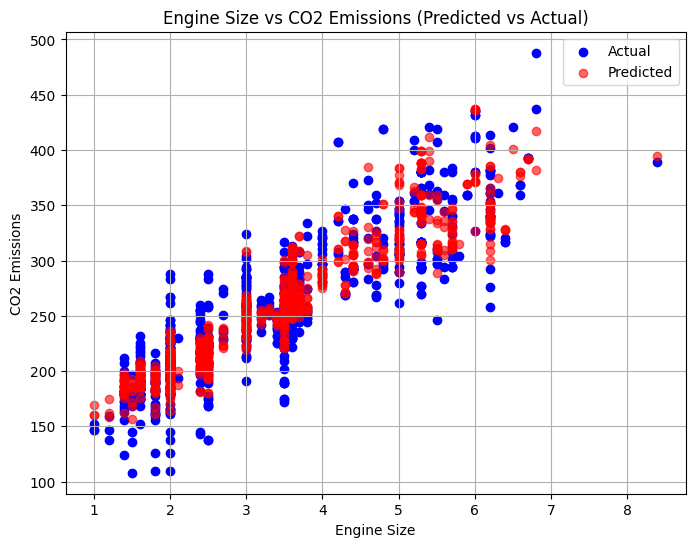

In [31]:
#Plotting Prediction Plane
plt.figure(figsize=(8,6))
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'],  color='blue', label='Actual')
predicted = regr.predict(x_train)
plt.scatter(train['ENGINESIZE'], predicted, color='red', label='Predicted', alpha=0.6)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.title("Engine Size vs CO2 Emissions (Predicted vs Actual)")
plt.grid(True)
plt.show()


In [32]:
#Testing and Evaluation
x_test = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

y_pred = regr.predict(x_test)

print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score: %.2f" % r2_score(y_test, y_pred))


Mean Absolute Error: 17.91
Mean Squared Error: 558.47
Root Mean Squared Error: 23.63
R² Score: 0.86


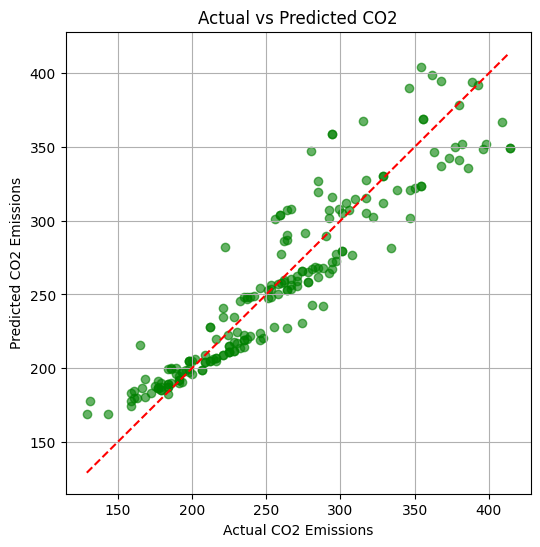

In [33]:
#Predicted vs Actual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2")
plt.grid(True)
plt.show()


In [34]:
#New Features
df = pd.read_csv('/content/FuelConsumption.csv')

cdf2 = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]
cdf2.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,196
1,2.4,4,11.2,7.7,221
2,1.5,4,6.0,5.8,136
3,3.5,6,12.7,9.1,255
4,3.5,6,12.1,8.7,244


In [35]:
#Check for Multicollinearity
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

X2 = cdf2[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
X2_const = add_constant(X2)

vif_data2 = pd.DataFrame()
vif_data2["Feature"] = X2_const.columns
vif_data2["VIF"] = [variance_inflation_factor(X2_const.values, i) for i in range(X2_const.shape[1])]
vif_data2["Tolerance"] = 1 / vif_data2["VIF"]
vif_data2


,Feature,VIF,Tolerance
0,const,21.441419,0.046639
1,ENGINESIZE,9.502716,0.105233
2,CYLINDERS,8.428974,0.118638
3,FUELCONSUMPTION_CITY,21.067195,0.047467
4,FUELCONSUMPTION_HWY,16.303767,0.061336


In [36]:
#Split Train/Test
msk = np.random.rand(len(cdf2)) < 0.8
train2 = cdf2[msk]
test2 = cdf2[~msk]


In [37]:
#Train New MLR Model
from sklearn.linear_model import LinearRegression

regr2 = LinearRegression()

x_train2 = np.asanyarray(train2[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y_train2 = np.asanyarray(train2[['CO2EMISSIONS']])

regr2.fit(x_train2, y_train2)

print("New Coefficients:", regr2.coef_)
print("New Intercept:", regr2.intercept_)


New Coefficients: [[12.14563366  7.30429611  5.73675233  3.04203404]]
New Intercept: [68.18307496]


In [38]:
#Test & Evaluate the New Model
x_test2 = np.asanyarray(test2[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y_test2 = np.asanyarray(test2[['CO2EMISSIONS']])

y_pred2 = regr2.predict(x_test2)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test2, y_pred2))
print("Mean Squared Error: %.2f" % mean_squared_error(y_test2, y_pred2))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test2, y_pred2)))
print("R² Score: %.2f" % r2_score(y_test2, y_pred2))


Mean Absolute Error: 17.68
Mean Squared Error: 570.49
Root Mean Squared Error: 23.88
R² Score: 0.85


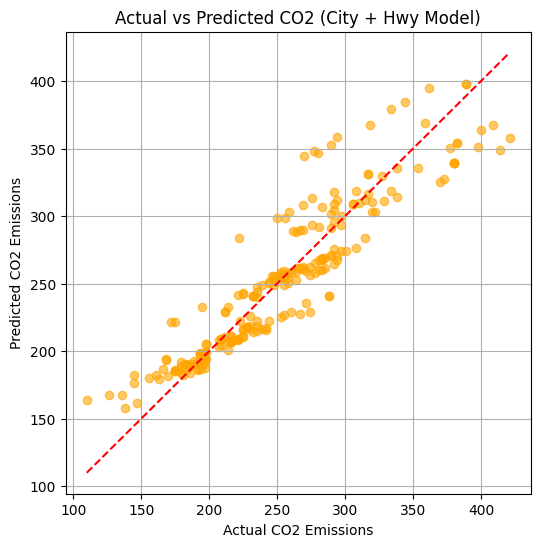

In [39]:
#Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test2, y_pred2, color='orange', alpha=0.6)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 (City + Hwy Model)")
plt.grid(True)
plt.show()
